In [24]:
import numpy as np
from tqdm import tqdm_notebook as tqdm
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
from matplotlib import ticker

In [25]:
N = 400
total=np.zeros((1,3))
faulty = []
for i in range(N):
    try:
        #test=np.loadtxt('FTCarbon_3rd_c+/FTCarbon_3rd_c+{}.txt'.format(i),delimiter=',')                      
        test=np.loadtxt('FTSteane_3rd_m/FTSteane_3rd_m{}.txt'.format(i),delimiter=',')                          
        #test=np.loadtxt('FTRotSurf_3rd_f+/FTRotSurf_3rd_f+{}.txt'.format(i),delimiter=',')                        

        #test = np.loadtxt("RotSurfFinal_a++/RotSurfFinal_a++{}.txt".format(i),delimiter=',')
        #test = np.loadtxt("SteaneFinal_a+/SteaneFinal_a+{}.txt".format(i),delimiter=',')
    except FileNotFoundError:
        faulty.append('{}'.format(i))
        continue
    total=total+test
total = total/(N-len(faulty))
print("Dead files: ", faulty,", ",len(faulty))
N = print(total)

Dead files:  [] ,  0
[[0.001    0.0015   0.002   ]
 [0.01     0.01325  0.02025 ]
 [0.611875 0.72775  0.789375]
 [0.270125 0.1665   0.11    ]
 [0.108    0.0925   0.080375]
 [0.011375 0.013    0.01975 ]
 [0.578    0.724875 0.8045  ]
 [0.308625 0.174    0.106125]
 [0.102    0.088125 0.069625]]


In [26]:
np.savetxt('text/FTSteane_3rd_m.txt', total, delimiter=",")
#np.savetxt('text/FTRotSurf_3rd_f+.txt', total, delimiter=",")
#np.savetxt('text/FTCarbon_e.txt', total, delimiter=",")

#np.savetxt('text/FTCarbon_3rd_c+.txt', total, delimiter=",")

#np.savetxt('text/RotSurfFinal_a++.txt', total, delimiter=",")
#np.savetxt('text/SteaneFinal_a+.txt', total, delimiter=",")

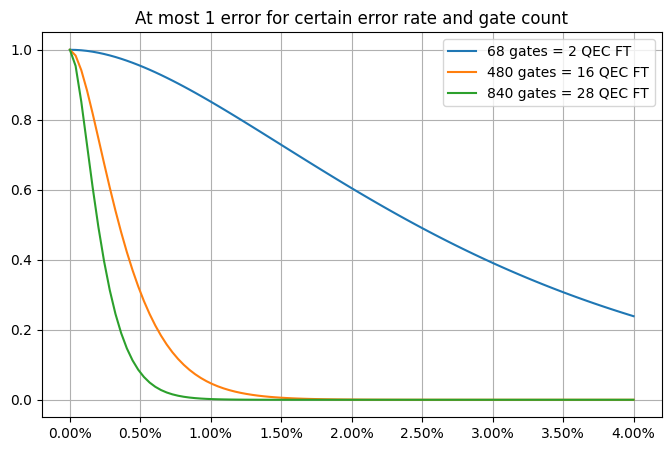

In [14]:
# p = 0.994
# print(p**150)
# print((p**149)*150*(1-p))

g = [68,16*30,28*30]
fig, ax = plt.subplots(figsize=(8,5))

for j in g:
    p = np.linspace(0.96,1,100)
    y = [(i**(j))+(i**(j-1))*j*(1-i) for i in p]
    p = [1-i for i in p]
    ax.plot(p,y,label="{} gates".format(j)+" = {} QEC FT".format(int(j/30)))

#ax.hlines(0.5,0,0.01, color="red", linewidth=3, linestyles="dotted")
ax.grid()
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 2))
plt.legend()
plt.title("At most 1 error for certain error rate and gate count")
plt.show()